In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


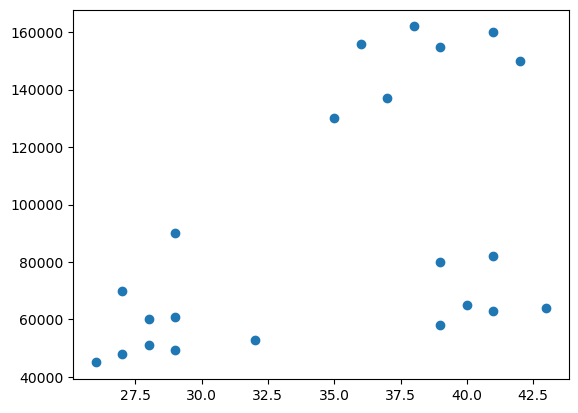

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [18]:
scaler=MinMaxScaler()
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])
#df.drop(df['income($)'],axis=1,inplace=True)
df.head()




,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [26]:
model=KMeans(n_clusters=3)
df['cluster']= model.fit_predict(df[['Age','Income($)']]) #because you dont have an X and y. its unsupervised

C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [30]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]


In [34]:
df[df['cluster']==0] #gives you a dataframe where cluster =0

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0


In [50]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

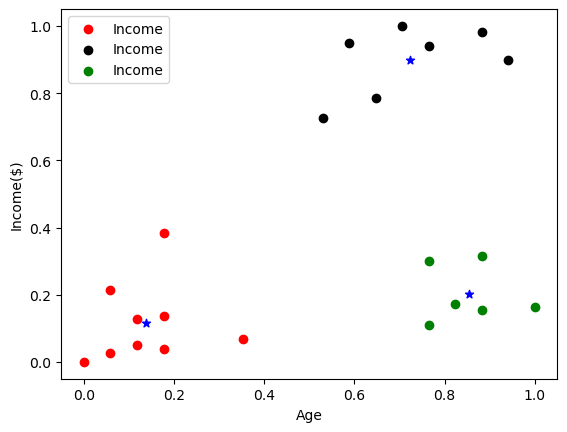

In [51]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df0['Age'],df0['Income($)'],color='Red')
plt.scatter(df1['Age'],df1['Income($)'],color='Black')
plt.scatter(df2['Age'],df2['Income($)'],color='Green')
plt.legend(['Income','Income','Income'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='blue',marker='*')

In [55]:
# Use Elbow technique to chosse correct k value
k_range=range(1,10)
sse=[]
for k in k_range:
    model=KMeans(n_clusters=k)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)
    

C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [56]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419564,
 0.2798062931046178,
 0.2105547899547249,
 0.16869711728567785,
 0.14090581089405504,
 0.10383752586603558]

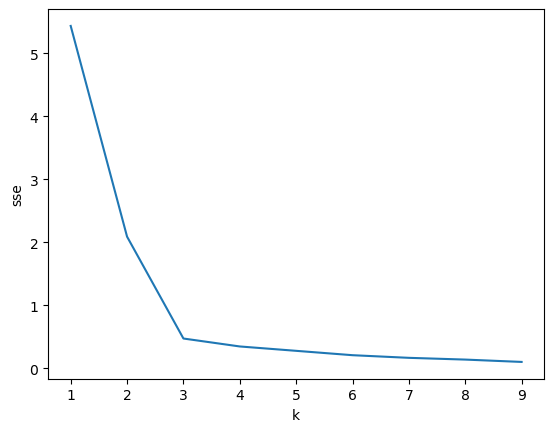

In [60]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_range,sse)

#### Excercise

In [93]:
from sklearn.datasets import load_iris
iris=load_iris()

In [94]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
df.drop(['sepal width (cm)','sepal length (cm)'],axis=1,inplace=True)

In [96]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


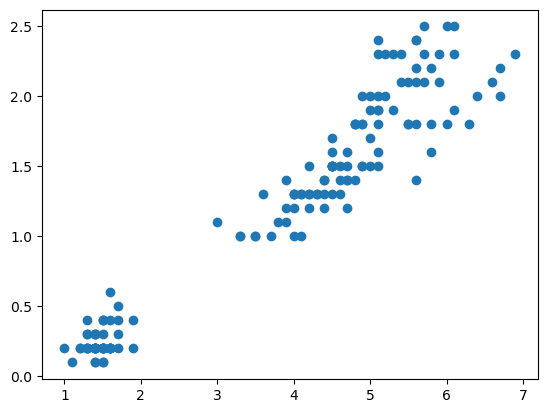

In [97]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [99]:
#Use MinMAXScaler
scaler= MinMaxScaler()
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])
df['petal length (cm)']=scaler.fit_transform(df[['petal length (cm)']])

In [100]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


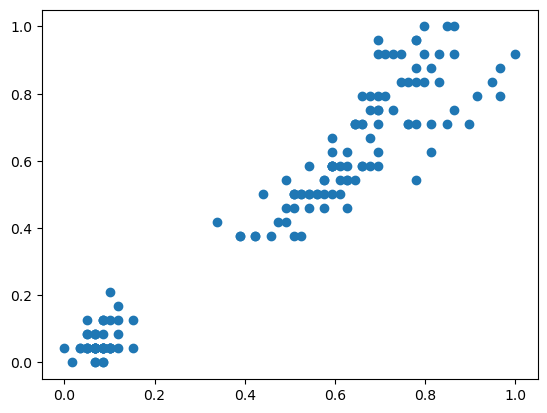

In [101]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [102]:
# find suitable k
k_range=range(1,10)
sse=[]
for k in k_range:
    model=KMeans(n_clusters=k)
    model.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(model.inertia_)


C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [103]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667124,
 0.853861735391224,
 0.6801035704886196,
 0.5663174952054539,
 0.48802625565735325,
 0.41565361271607326]

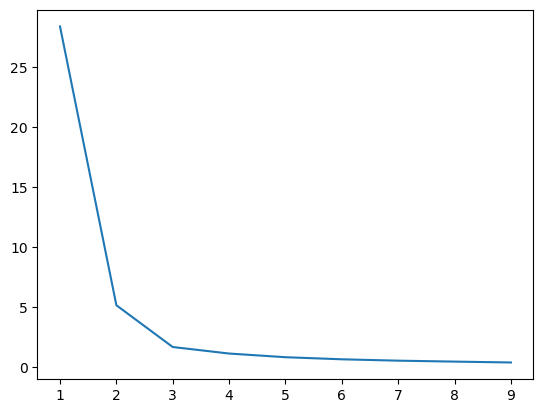

In [104]:
plt.plot(k_range,sse)

In [106]:
model=KMeans(n_clusters=3)
df['cluster']  = model.fit_predict(df[['petal length (cm)','petal width (cm)']])
    

C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [108]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [109]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

In [113]:
model.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

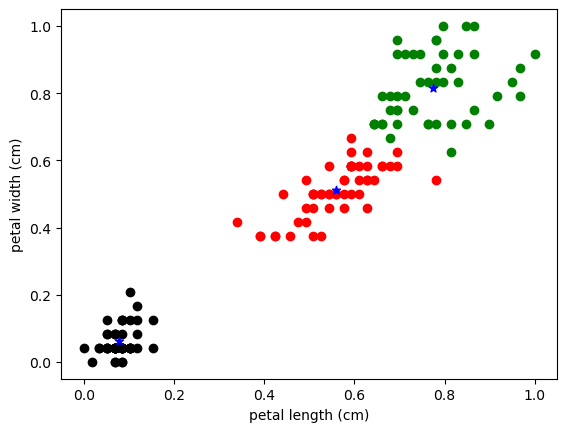

In [114]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='black')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='blue',marker='*')